In [108]:
import os
from selenium import webdriver
from tqdm import tqdm_notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import platform

from matplotlib import font_manager, rc
path = 'c:/windows/Fonts/malgun.ttf'

font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

In [3]:
from glob import glob

In [6]:
file_list = glob('../data/지하수/*')

In [64]:
file_list

['../data/지하수\\경찰병원_2017.xls',
 '../data/지하수\\경찰병원_2018.xls',
 '../data/지하수\\마천국민임대주택단지_2017.xls',
 '../data/지하수\\마천국민임대주택단지_2018.xls',
 '../data/지하수\\문정래미안_2017.xls',
 '../data/지하수\\문정래미안_2018.xls',
 '../data/지하수\\부리근린공원_2017.xls',
 '../data/지하수\\부리근린공원_2018.xls',
 '../data/지하수\\송례중학교_2017.xls',
 '../data/지하수\\송례중학교_2018.xls',
 '../data/지하수\\송파참노인전문병원_2017.xls',
 '../data/지하수\\송파참노인전문병원_2018.xls',
 '../data/지하수\\수연빌딩_2017.xls',
 '../data/지하수\\수연빌딩_2018.xls',
 '../data/지하수\\아이코리아_2017.xls',
 '../data/지하수\\아이코리아_2018.xls',
 '../data/지하수\\연화근린공원_2017.xls',
 '../data/지하수\\연화근린공원_2018.xls',
 '../data/지하수\\영동일고_2017.xls',
 '../data/지하수\\영동일고_2018.xls',
 '../data/지하수\\올림픽파크텔_2017.xls',
 '../data/지하수\\올림픽파크텔_2018.xls',
 '../data/지하수\\잠실고등학교_2017.xls',
 '../data/지하수\\잠실고등학교_2018.xls',
 '../data/지하수\\전파관리소_2017.xls',
 '../data/지하수\\전파관리소_2018.xls',
 '../data/지하수\\창덕여고_2017.xls',
 '../data/지하수\\창덕여고_2018.xls',
 '../data/지하수\\태양근린공원_2017.xls',
 '../data/지하수\\태양근린공원_2018.xls']

In [10]:
file_list[0]

'../data/지하수\\경찰병원_2017.xls'

In [43]:
df = pd.read_html(file_list[0], encoding='utf8')[0]

In [44]:
df.columns

Index(['관측일시', '수위(m)', '수온(℃)', '전기전도도(㎲/㎝)', '비고'], dtype='object')

In [52]:
df.columns = ['일시','수위','수온','전기','비고']
df.columns

Index(['일시', '수위', '수온', '전기', '비고'], dtype='object')

In [53]:
df.shape

(6833, 5)

In [54]:
df.isna().sum()

일시       0
수위       0
수온       0
전기       0
비고    6833
dtype: int64

In [57]:
location = file_list[0][12:-9]
location

'경찰병원'

In [59]:
df['지역'] = [location for _ in range(len(df))]

In [61]:
df = pd.DataFrame({
    '지역':df['지역'],
    '일시':df['일시'],
    '수위':df['수위'],
                  })
df.head()

,지역,일시,수위
0,경찰병원,2017.12.31 23시,9.49
1,경찰병원,2017.12.31 22시,9.49
2,경찰병원,2017.12.31 21시,9.49
3,경찰병원,2017.12.31 20시,9.48
4,경찰병원,2017.12.31 19시,9.48


In [93]:
df[df.columns[0]][0]

'태양근린공원'

In [94]:
#todo all data
res = pd.DataFrame(columns=df.columns)

for file in tqdm_notebook(file_list):
    df = pd.read_html(file, encoding='utf8')[0]
    if df[df.columns[0]][0]=='조회된 자료가 없습니다.':
        continue
    df.columns = ['일시','수위','수온','전기','비고']
    location = file[12:-9]
    df['지역'] = [location for _ in range(len(df))]
    df = pd.DataFrame({
    '지역':df['지역'],
    '일시':df['일시'],
    '수위':df['수위'],
                  })
    res = pd.concat([res,df])
print(res.shape)
res.head()


(193168, 3)


,지역,일시,수위
0,경찰병원,2017.12.31 23시,9.49
1,경찰병원,2017.12.31 22시,9.49
2,경찰병원,2017.12.31 21시,9.49
3,경찰병원,2017.12.31 20시,9.48
4,경찰병원,2017.12.31 19시,9.48


In [95]:
res.to_csv('../data/지하수_통합데이터.csv',encoding='utf-8-sig', index=False)

In [96]:
res['지역'].unique()

array(['경찰병원', '마천국민임대주택단지', '문정래미안', '부리근린공원', '송례중학교', '송파참노인전문병원',
       '수연빌딩', '아이코리아', '연화근린공원', '영동일고', '올림픽파크텔', '잠실고등학교', '태양근린공원'],
      dtype=object)

In [97]:
len(res['지역'].unique())

13

In [98]:
res_unique = pd.pivot_table(res, index=['지역'], aggfunc=np.mean)
res_unique

,수위
지역,
경찰병원,9.951048
마천국민임대주택단지,9.409545
문정래미안,11.684816
부리근린공원,6.177035
송례중학교,10.478760
송파참노인전문병원,54.726090
수연빌딩,9.010427
아이코리아,6.678902
연화근린공원,12.832227


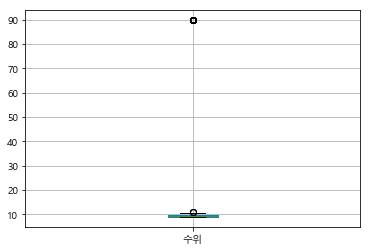

In [124]:
df = res[res['지역']==res['지역'].unique()[0]]
df.boxplot()

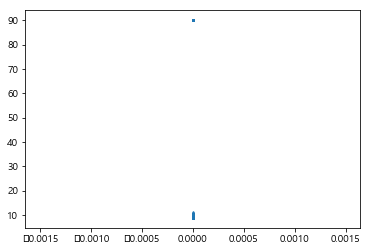

In [137]:
plt.scatter([0 for _ in range(len(df))],df.수위,s=1)

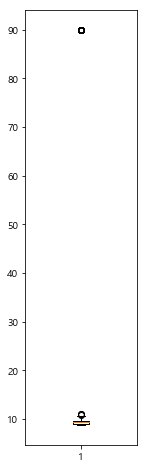

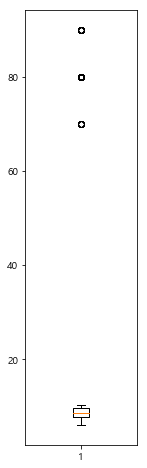

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1262: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


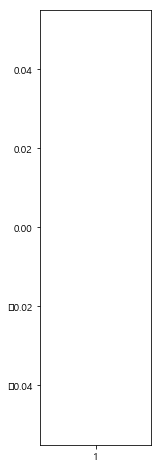

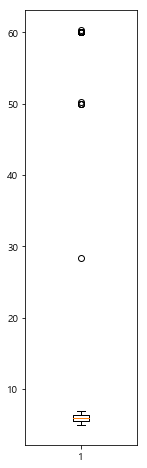

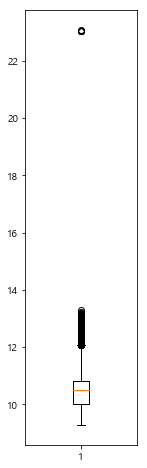

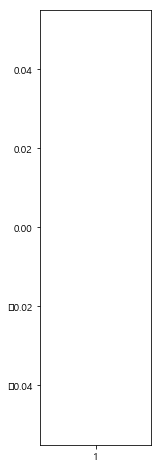

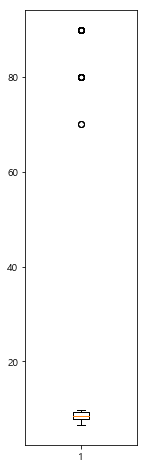

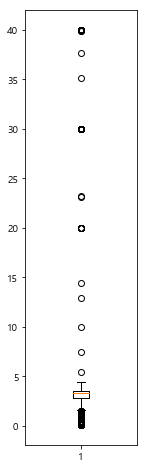

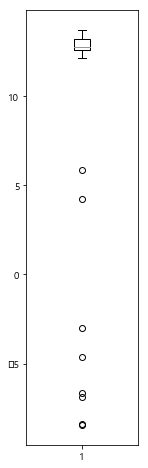

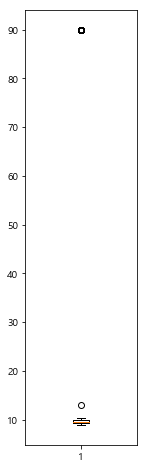

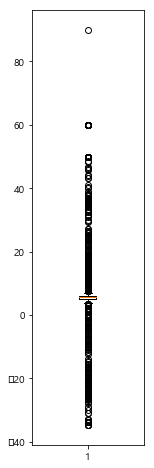

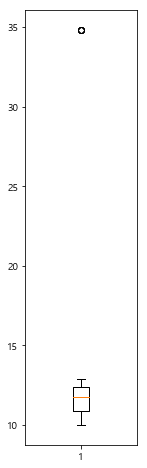

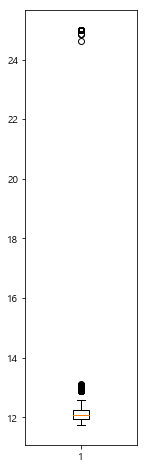

In [145]:
for location in res['지역'].unique():
    df = res[res['지역']==location]
    plt.figure(figsize=(2,8))
    plt.boxplot(df['수위'],)
    plt.show()